## sklearn

In [3]:
from sklearn import datasets
import numpy as np

iris=datasets.load_iris()
X=iris.data[:, [2,3]]
y=iris.target

print('클래스 레이블: ',np.unique(y))


클래스 레이블:  [0 1 2]


In [13]:
# 데이터 scale check
len(iris.data)
len(iris.target)

150

In [15]:
# 레이블 체크
np.unique(y)

array([0, 1, 2])

In [18]:
# train & test set 쪼개기
from sklearn.model_selection import train_test_split
# random_state= shuffle 작업. 특정 값을 주면, 계속 같은 값 반환.
# stratify=> 계층화 기능. train, test함수가 훈련세트와 테스트 세트 레이블 비율 동일하게 만든다. 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [19]:
print('y의 레이블 카운트: ', np.bincount(y))

y의 레이블 카운트:  [50 50 50]


In [20]:
print('y_train의 레이블 카운트: ', np.bincount(y_train))

y_train의 레이블 카운트:  [35 35 35]


In [21]:
print('y_test의 레이블 카운트: ', np.bincount(y_test))

y_test의 레이블 카운트:  [15 15 15]


특성 스케일 조정

In [23]:
from sklearn.preprocessing import StandardScaler

# 훈련 데이터를 표준화 하겠다. fit 메서드 - 각 특성마다 샘플평균과 표준편차 계산. 
# transform 메서드를 호출하면 훈련 세트 표준화
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [24]:
from sklearn.linear_model import Perceptron

ppn=Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
y_pred=ppn.predict(X_test_std)
print("잘못 분류된 샘플 개수: %d" %(y_test!=y_pred).sum())


잘못 분류된 샘플 개수: 1


정확도 계산하기

In [26]:
from sklearn.metrics import accuracy_score

print("정확도 : %.2f" % accuracy_score(y_test, y_pred))


정확도 : 0.98


In [30]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier, test_idx=None, resolution=0.02):
    
    # 마커와 컬러맵을 설정합니다. 
    markers=('s', 'x', 'o', '^', 'v')
    colors=('red', 'blue','lightgreen', 'gray', 'cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #결정 경계 그리기
    x1_min,x1_max=X[:,0].min()-1, X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1, X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    if test_idx:
        X_test, y_test=X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
        
        

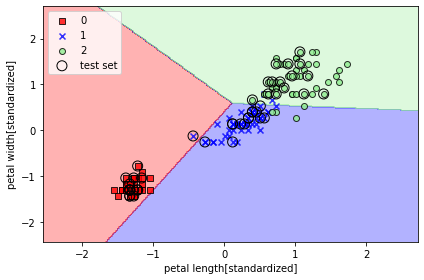

In [31]:
X_combined_std=np.vstack((X_train_std, X_test_std))
y_combined=np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()